# Установка PySpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Загрузка данных из CSV

In [0]:
df = spark.read.csv('power.csv', inferSchema=True, header=True)

# Базовый обзор данных

In [9]:
df.show(5)

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
+-------+----+--------+--------+
only showing top 5 rows



In [10]:
df.count()

1189482

In [11]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [12]:
df.take(2)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1)]

# Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [0]:
df_practice = spark.read.csv('transactions.csv', inferSchema = True, header = True)

In [14]:
df_practice.take(10)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200),
 Row(Year=2017, Month=2, ID='t004', Product='A4', Amount=1, Price=8618, Total=8618, Cost=4200),
 Row(Year=2017, Month=2, ID='t005', Product='A5', Amount=3, Price=5175, Total=15525, Cost=500),
 Row(Year=2017, Month=2, ID='t006', Product='_6', Amount=4, Price=3500, Total=14000, Cost=200),
 Row(Year=2017, Month=3, ID='t007', Product='_3', Amount=6, Price=1265, Total=7590, Cost=200),
 Row(Year=2017, Month=3, ID='t008', Product='_5', Amount=2, Price=5175, Total=10350, Cost=1200),
 Row(Year=2017, Month=4, ID='t009', Product='_8', Amount=3, Price=3760, Total=11280, Cost=1000),
 Row(Year=2017, Month=4, ID='t010', Product='_4', Amount=2, Price=8618, Total=17236, Cost=3400)]

In [15]:
df_practice.show()

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
|2017|    2|t006|     _6|     4| 3500|14000| 200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    3|t008|     _5|     2| 5175|10350|1200|
|2017|    4|t009|     _8|     3| 3760|11280|1000|
|2017|    4|t010|     _4|     2| 8618|17236|3400|
|2017|    4|t011|     _2|     4| 1896| 7584| 800|
|2017|    4|t012|     _5|     5| 5175|25875| 700|
|2017|    4|t013|     _8|     3| 3760|11280|1200|
|2017|    4|t014|     _4|     1| 8618| 8618| 250|
|2017|    5|t015|     _2|     2| 1896| 3792| 650|
|2017|    5|t016|     A4|     3| 8618|25854|2400|
|2017|    5|t017|     A5|     2| 5175|10350|1200|


# Выборки

In [16]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.take(1)

[Row(country='Austria', year=1996, quantity=5.0)]

In [17]:
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [18]:
df_lim.columns

['country', 'y', 'quantity']

In [19]:
df_lim.show(1)

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
+-------+----+--------+
only showing top 1 row



# Описание и статистики

In [20]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [21]:
df_lim.describe().show()

+-------+-----------+------------------+--------------------+
|summary|    country|                 y|            quantity|
+-------+-----------+------------------+--------------------+
|  count|    1189482|           1189482|             1189482|
|   mean|       null|2002.8515538696677|  184264.77005012735|
| stddev|       null| 7.167344581291499|1.5856628141359948E7|
|    min|Afghanistan|              1990|           -864348.0|
|    max|   Zimbabwe|              2014|          6.680329E9|
+-------+-----------+------------------+--------------------+



# Сохранение

In [0]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

Сохраняет каждую партицию dataframe в отдельный csv файл

# Отложенные вычисления

In [0]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)

In [24]:
df_lim.show(2)

+-------+----+--------+------------+
|country|   y|quantity|quantity x 2|
+-------+----+--------+------------+
|Austria|1996|     5.0|        10.0|
|Austria|1995|    17.0|        34.0|
+-------+----+--------+------------+
only showing top 2 rows



In [0]:
df_grp = df_lim.groupBy('country')

In [0]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [27]:
# Здесь произойдут основные вычисления
df_sum.show()

+------------------+--------------------+--------------------+
|           country|       sum(quantity)|   sum(quantity x 2)|
+------------------+--------------------+--------------------+
|     Côte d'Ivoire| 2.815485732456253E7| 5.630971464912506E7|
|              Chad|  3796498.7491319943|   7592997.498263989|
|          Paraguay|     1.23209483765E7|      2.4641896753E7|
|          Anguilla|   20529.34999999997|   41058.69999999994|
|             Yemen|1.8178937740390217E8|3.6357875480780435E8|
|State of Palestine|  1318668.0123446316|   2637336.024689263|
|           Senegal|   6944395.348079733|1.3888790696159465E7|
|            Sweden|1.3456236759933385E8| 2.691247351986677E8|
|        Cabo Verde|   88130.27080000004|  176260.54160000008|
|          Kiribati|   6450.091429000002|  12900.182858000004|
|            Guyana|   772150.6722661877|  1544301.3445323755|
|       Philippines|  8.45277094530091E7| 1.690554189060182E8|
|           Eritrea|   918454.1476713057|  1836908.2953

# Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [28]:
df_practice.show(5)

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
+----+-----+----+-------+------+-----+-----+----+
only showing top 5 rows



In [0]:
df_practice_grouped = df_practice.groupBy('Product')

In [30]:
df_practice_max =  df_practice_grouped.max('Amount')
df_practice_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [31]:
df_practice_min = df_practice_grouped.min('Amount')
df_practice_min.show()

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
|     _4|          1|
|     _6|          4|
|     A4|          1|
|     A5|          2|
|     A1|          2|
+-------+-----------+



# Соединения

In [0]:
from pyspark.sql import Row

row = Row("name", "pet", "count")

In [0]:
sc = spark.sparkContext

In [0]:
df1 = sc.parallelize([
    row("Sue", "cat", 16),
    row("Kim", "dog", 1),    
    row("Bob", "fish", 5)
    ]).toDF()

df2 = sc.parallelize([
    row("Fred", "cat", 2),
    row("Kate", "ant", 179),    
    row("Marc", "lizard", 5)
    ]).toDF()

df3 = sc.parallelize([
    row("Sarah", "shark", 3),
    row("Jason", "kids", 2),    
    row("Scott", "squirrel", 1)
    ]).toDF()

In [35]:
df_union = df1.unionAll(df2)
df_union.show()

+----+------+-----+
|name|   pet|count|
+----+------+-----+
| Sue|   cat|   16|
| Kim|   dog|    1|
| Bob|  fish|    5|
|Fred|   cat|    2|
|Kate|   ant|  179|
|Marc|lizard|    5|
+----+------+-----+



In [0]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [0]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),    
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),    
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [38]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Sue| cat|   16| eagle|     2|
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
+----+----+-----+------+------+



In [39]:
df1.join(df2, 'name', how='outer').show()

+---------+-----+-----+------+------+
|     name|  pet|count|  pet2|count2|
+---------+-----+-----+------+------+
|      Sue|  cat|   16| eagle|     2|
|Ferdinand| null| null|  bees|    23|
|      Bob| fish|    5|lizard|     5|
|      Kim|  dog|    1|   ant|   179|
|   Libuse|horse|    1|  null|  null|
+---------+-----+-----+------+------+



In [40]:
df1.join(df2, 'name', how='left').show()

+------+-----+-----+------+------+
|  name|  pet|count|  pet2|count2|
+------+-----+-----+------+------+
|   Sue|  cat|   16| eagle|     2|
|   Bob| fish|    5|lizard|     5|
|   Kim|  dog|    1|   ant|   179|
|Libuse|horse|    1|  null|  null|
+------+-----+-----+------+------+



In [41]:
df1.join(df2, 'name', how='right').show()

+---------+----+-----+------+------+
|     name| pet|count|  pet2|count2|
+---------+----+-----+------+------+
|      Sue| cat|   16| eagle|     2|
|Ferdinand|null| null|  bees|    23|
|      Bob|fish|    5|lizard|     5|
|      Kim| dog|    1|   ant|   179|
+---------+----+-----+------+------+



# Практика 3. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [0]:
df_practice_avg = df_practice_grouped.avg('Amount')

In [0]:
df_practice_join = df_practice_max.join(df_practice_min, on = 'Product', how='left')

In [44]:
df_practice_join.join(df_practice_avg, on = 'Product', how='left')

DataFrame[Product: string, max(Amount): int, min(Amount): int, avg(Amount): double]

In [45]:
df_practice_join.show()

+-------+-----------+-----------+
|Product|max(Amount)|min(Amount)|
+-------+-----------+-----------+
|     _5|          6|          1|
|     _2|          8|          1|
|     A2|          2|          2|
|     _8|         10|          1|
|     _3|          7|          2|
|     _4|          3|          1|
|     _6|          4|          4|
|     A4|          3|          1|
|     A5|          7|          2|
|     A1|          9|          2|
+-------+-----------+-----------+



# Сводники

In [46]:
df_lim.show()

+-------+----+--------+------------+
|country|   y|quantity|quantity x 2|
+-------+----+--------+------------+
|Austria|1996|     5.0|        10.0|
|Austria|1995|    17.0|        34.0|
|Belgium|2014|     0.0|         0.0|
|Belgium|2013|     0.0|         0.0|
|Belgium|2012|    35.0|        70.0|
|Belgium|2011|    25.0|        50.0|
|Belgium|2010|    22.0|        44.0|
|Belgium|2009|    45.0|        90.0|
|Czechia|1998|     1.0|         2.0|
|Czechia|1995|     7.0|        14.0|
|Finland|2010|     9.0|        18.0|
|Finland|2009|    13.0|        26.0|
|Finland|2008|    39.0|        78.0|
|Finland|2007|    21.0|        42.0|
|Finland|2006|     0.0|         0.0|
|Finland|2005|     0.0|         0.0|
|Finland|2004|     0.0|         0.0|
|Finland|2003|     0.0|         0.0|
|Finland|2002|     0.0|         0.0|
|Finland|2001|     0.0|         0.0|
+-------+----+--------+------------+
only showing top 20 rows



In [47]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+------------------+--------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|           country|                1990|              1991|              1992|                1993|              1994|                1995|              1996|                1997|              1998|              1999|              2000|              2001|              2002|                2003|                2004|                2005|                2006|                2007|                2008|                2009|                2010|               2011|          

# Практика 4. Постройте разбивку по количеству продуктов по месяцам

In [48]:
df_practice_pivot = df_practice.groupby('Product').pivot('month').sum('Amount')
df_practice_pivot.show()

+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|Product|   1|   2|   3|   4|   5|   6|   7|   8|   9|  10|  11|  12|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|     _5|null|null|   2|   5|  10|   2|null|   1|   6|   6|   5|   2|
|     _2|null|null|null|   4|   2|   1|  10|null|   8|null|   5|   8|
|     A2|   2|null|null|null|null|null|null|null|null|null|   2|null|
|     _8|null|null|null|   6|null|  13|null|null|   1|   3|null|   5|
|     _3|null|null|   6|null|  12|null|null|   2|   3|   3|null|   4|
|     _4|null|null|null|   3|null|   3|   2|null|   2|   2|null|   2|
|     _6|null|   4|null|null|   4|null|null|null|null|null|null|null|
|     A4|null|   1|null|null|   3|null|   3|null|null|null|   3|null|
|     A5|null|   3|null|null|   2|null|null|   2|null|null|  13|null|
|     A1|   7|   5|null|null|null|null|null|null|null|null|   7|   9|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+



# Подвыборки

In [49]:
df.show(5)

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
+-------+----+--------+--------+
only showing top 5 rows



In [50]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.show()

+-------+----+--------+
|country|year|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [51]:
df.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|             1189482|
|   mean|  184264.77005012735|
| stddev|1.5856628141359948E7|
|    min|           -864348.0|
|    max|          6.680329E9|
+-------+--------------------+



In [52]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



In [53]:
# Параметры - с повторением или без, какую долю dataset'а взять
df_sample = df.sample(False, 0.05)
df_sample.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|               59871|
|   mean|  174819.93785599267|
| stddev|1.0030152211049361E7|
|    min|           -108882.0|
|    max|         1.7520429E9|
+-------+--------------------+



# Практика 5. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук

In [54]:
df_practice_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [55]:
df_practice_max[df_practice_max['max(Amount)'] > 5].show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [56]:
df_practice_max.where(df_practice_max['max(Amount)'] > 5).show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



# Визуализация

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|2.781426135733307E10|
|1991| 2.466541930678139E9|
|1992|2.1419483655120907E9|
|1993|1.818040678302332...|
|1994| 2.286637409479232E9|
|1995|1.8993733981039996E9|
|1996| 1.276732195368936E9|
|1997|2.368193080700125...|
|1998| 8.729463830731297E9|
|1999| 7.766232101772736E9|
|2000| 7.004882006062636E9|
|2001|4.0475256363267155E9|
|2002| 3.812004491308077E9|
|2003| 1.407111379702272E9|
|2004|1.4498832309942997E9|
|2005|1.623457574857694...|
|2006|1.5714035023136258E9|
|2007| 9.477595462966421E9|
|2008|1.288885727194202...|
|2009|1.6234129606657305E9|
+----+--------------------+
only showing top 20 rows



In [0]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

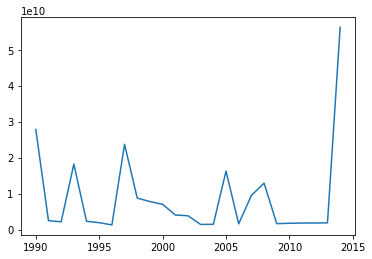

In [60]:
plt.figure()
plt.plot(years, sums)
plt.show()

In [0]:
pd_df = to_show.toPandas()

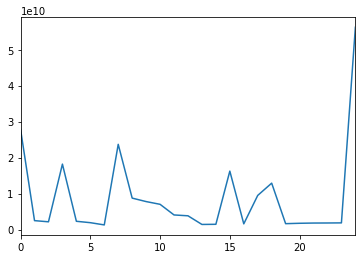

In [62]:
pd_df['sum(quantity)'].plot()

# Домашнее задание
- Скачайте dataset iris https://gist.github.com/netj/8836201
- Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
- Визуализируйте точечный график (plt.scatter) по каждой паре параметров
- Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
- Сделайте отдельную колонку для своего предсказания
- Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [96]:
iris = spark.read.csv('iris.csv', inferSchema=True, header=True)
iris.show(5)

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [97]:
iris = iris.withColumnRenamed("sepal.length", "sepal_length")
iris = iris.withColumnRenamed("sepal.width", "sepal_width")
iris = iris.withColumnRenamed("petal.length", "petal_length")
iris = iris.withColumnRenamed("petal.width", "petal_width")
iris.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [0]:
irisgrouped = iris.groupby('variety')

In [99]:
irisgrouped_max = irisgrouped.max("sepal_length", "sepal_width", "petal_length", "petal_width")
irisgrouped_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [100]:
irisgrouped_avg = irisgrouped.avg("sepal_length", "sepal_width", "petal_length", "petal_width")
irisgrouped_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [101]:
irisgrouped_min = irisgrouped.min("sepal_length", "sepal_width", "petal_length", "petal_width")
irisgrouped_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [0]:
iris_sepal = iris['sepal_length', 'sepal_width', 'variety']
iris_petal = iris['petal_length', 'petal_width', 'variety']
iris_length = iris['sepal_length' ,'petal_length', 'variety']
iris_width = iris['sepal_width' ,'petal_width', 'variety']

In [0]:
iris_sepal = iris_sepal.toPandas()
iris_petal = iris_petal.toPandas()
iris_length = iris_length.toPandas()
iris_width = iris_width.toPandas()

In [0]:
import seaborn as sns

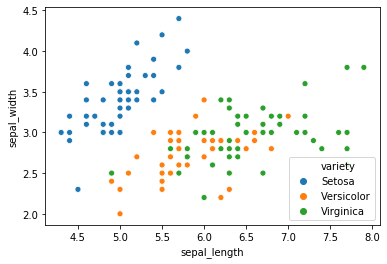

In [105]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue ='variety', data = iris_sepal)

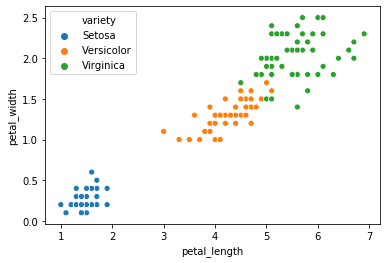

In [106]:
sns.scatterplot(x='petal_length', y='petal_width', hue ='variety', data = iris_petal)

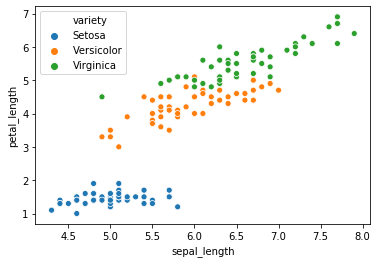

In [107]:
sns.scatterplot(x='sepal_length', y='petal_length', hue ='variety', data = iris_length)

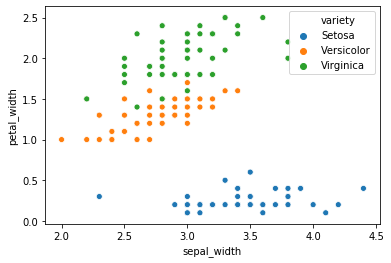

In [108]:
sns.scatterplot(x='sepal_width', y='petal_width', hue ='variety', data = iris_width)

In [0]:
petal_length = iris[['petal_length']].collect()

In [0]:
from pyspark.sql import functions as F

In [0]:
iris = iris.withColumn('variety_pred', F.when(iris['petal_length']< 2.5, 'Setosa').otherwise('Else'))

In [113]:
iris.show()

+------------+-----------+------------+-----------+-------+------------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_pred|
+------------+-----------+------------+-----------+-------+------------+
|         5.1|        3.5|         1.4|        0.2| Setosa|      Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|      Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|      Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|      Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|      Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|      Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|      Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|      Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|      Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|      Setosa|
|         5.4|        3.7|         1.5|        0.2|

In [119]:
#Проверка
print(iris[iris['variety'] == 'Setosa'].count())
print(iris[iris['variety_pred'] == 'Setosa'].count())
print(iris[(iris['variety'] == 'Setosa') & (iris['variety_pred'] == 'Setosa')].count())

50
50
50
